In [1]:
from codecarbon import EmissionsTracker

# Set up the emissions tracker
tracker = EmissionsTracker()

[codecarbon INFO @ 22:44:17] [setup] RAM Tracking...
[codecarbon INFO @ 22:44:17] [setup] GPU Tracking...
[codecarbon INFO @ 22:44:17] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 22:44:17] [setup] CPU Tracking...
[codecarbon WARNING @ 22:44:17] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 22:44:19] We saw that you have a 12th Gen Intel(R) Core(TM) i7-12700H but we don't know it. Please contact us.
[codecarbon INFO @ 22:44:19] CPU Model on constant consumption mode: 12th Gen Intel(R) Core(TM) i7-12700H
[codecarbon INFO @ 22:44:19] >>> Tracker's metadata:
[codecarbon INFO @ 22:44:19]   Platform system: Windows-10-10.0.22000-SP0
[codecarbon INFO @ 22:44:19]   Python version: 3.8.5
[codecarbon INFO @ 22:44:19]   CodeCarbon version: 2.3.5
[codecarbon INFO @ 22:44:19]   Available RAM : 15.692 GB
[codecarbon INFO @ 22:44:19]   CPU count: 20
[codecarbon INFO @ 22:44:19]   CPU model: 12th Gen Intel(R) Core(TM) i7-12700H
[codecarbon INFO @ 22:44:19] 

In [2]:
# Start tracking
tracker.start()

In [3]:
import pandas as pd

# Load the data from the provided CSV file
file_path = '../data/Water Level - San Diego - v2.csv'
san_diego_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
san_diego_data.head(), san_diego_data.columns


(       Date Time (GMT)  Predicted (ft)  Verified (ft)
 0  1/1/2023       0:00           3.152           3.48
 1  1/1/2023       1:00           3.354           3.78
 2  1/1/2023       2:00           3.245           3.72
 3  1/1/2023       3:00           2.906           3.36
 4  1/1/2023       4:00           2.439           3.06,
 Index(['Date', 'Time (GMT)', 'Predicted (ft)', 'Verified (ft)'], dtype='object'))

In [4]:
# Convert 'Date' and 'Time (GMT)' to datetime and set as index
san_diego_data['Datetime'] = pd.to_datetime(san_diego_data['Date'] + ' ' + san_diego_data['Time (GMT)'])
san_diego_data.set_index('Datetime', inplace=True)

# Create lag features for 24 hours
for lag in range(1, 25):
    san_diego_data[f'lag_{lag}_hour'] = san_diego_data['Verified (ft)'].shift(lag)

# Remove rows with NaN values which will be the first 24 hours
san_diego_data_clean = san_diego_data.dropna()

# Preview the updated dataframe
san_diego_data_clean.head()


,Date,Time (GMT),Predicted (ft),Verified (ft),lag_1_hour,lag_2_hour,lag_3_hour,lag_4_hour,lag_5_hour,lag_6_hour,...,lag_15_hour,lag_16_hour,lag_17_hour,lag_18_hour,lag_19_hour,lag_20_hour,lag_21_hour,lag_22_hour,lag_23_hour,lag_24_hour
Datetime,,,,,,,,,,,,,,,,,,,,,
2023-01-02 00:00:00,1/2/2023,0:00,2.371,2.82,2.05,1.43,1.14,1.12,1.53,2.42,...,3.72,3.05,2.56,2.44,2.72,3.06,3.36,3.72,3.78,3.48
2023-01-02 01:00:00,1/2/2023,1:00,3.007,3.50,2.82,2.05,1.43,1.14,1.12,1.53,...,4.67,3.72,3.05,2.56,2.44,2.72,3.06,3.36,3.72,3.78
2023-01-02 02:00:00,1/2/2023,2:00,3.332,3.85,3.50,2.82,2.05,1.43,1.14,1.12,...,5.61,4.67,3.72,3.05,2.56,2.44,2.72,3.06,3.36,3.72
2023-01-02 03:00:00,1/2/2023,3:00,3.334,3.83,3.85,3.50,2.82,2.05,1.43,1.14,...,6.10,5.61,4.67,3.72,3.05,2.56,2.44,2.72,3.06,3.36
2023-01-02 04:00:00,1/2/2023,4:00,3.082,3.55,3.83,3.85,3.50,2.82,2.05,1.43,...,6.33,6.10,5.61,4.67,3.72,3.05,2.56,2.44,2.72,3.06


In [5]:
# Load the future data provided by the user
future_data_path = '../data/future data - San Diego.csv'
future_data = pd.read_csv(future_data_path)

# Convert 'Date' and 'Time (GMT)' to datetime and set as index
future_data['Datetime'] = pd.to_datetime(future_data['Date'] + ' ' + future_data['Time (GMT)'])
future_data.set_index('Datetime', inplace=True)

# Create lag features for the future data
for lag in range(1, 25):
    future_data[f'lag_{lag}_hour'] = future_data['Verified (ft)'].shift(lag)

# Remove rows with NaN values
future_data_clean = future_data.dropna()

# Display the prepared future data
future_data_clean.head(), future_data_clean.columns


(Empty DataFrame
 Columns: [Date, Time (GMT), Predicted (ft), Verified (ft), lag_1_hour, lag_2_hour, lag_3_hour, lag_4_hour, lag_5_hour, lag_6_hour, lag_7_hour, lag_8_hour, lag_9_hour, lag_10_hour, lag_11_hour, lag_12_hour, lag_13_hour, lag_14_hour, lag_15_hour, lag_16_hour, lag_17_hour, lag_18_hour, lag_19_hour, lag_20_hour, lag_21_hour, lag_22_hour, lag_23_hour, lag_24_hour]
 Index: []
 
 [0 rows x 28 columns],
 Index(['Date', 'Time (GMT)', 'Predicted (ft)', 'Verified (ft)', 'lag_1_hour',
        'lag_2_hour', 'lag_3_hour', 'lag_4_hour', 'lag_5_hour', 'lag_6_hour',
        'lag_7_hour', 'lag_8_hour', 'lag_9_hour', 'lag_10_hour', 'lag_11_hour',
        'lag_12_hour', 'lag_13_hour', 'lag_14_hour', 'lag_15_hour',
        'lag_16_hour', 'lag_17_hour', 'lag_18_hour', 'lag_19_hour',
        'lag_20_hour', 'lag_21_hour', 'lag_22_hour', 'lag_23_hour',
        'lag_24_hour'],
       dtype='object'))

In [6]:
# Display the initial rows of the future data as uploaded
initial_future_data_display = future_data.head(10)
last_future_data_display = future_data.tail(10)

initial_future_data_display, last_future_data_display


(                         Date Time (GMT)  Predicted (ft)  Verified (ft)  \
 Datetime                                                                  
 2024-04-01 00:00:00  4/1/2024       0:00           2.558           3.16   
 2024-04-01 01:00:00  4/1/2024       1:00           2.640           3.27   
 2024-04-01 02:00:00  4/1/2024       2:00           2.809           3.33   
 2024-04-01 03:00:00  4/1/2024       3:00           3.071           3.57   
 2024-04-01 04:00:00  4/1/2024       4:00           3.423           3.95   
 2024-04-01 05:00:00  4/1/2024       5:00           3.842           4.34   
 2024-04-01 06:00:00  4/1/2024       6:00           4.261           4.72   
 2024-04-01 07:00:00  4/1/2024       7:00           4.585           5.07   
 2024-04-01 08:00:00  4/1/2024       8:00           4.744           5.31   
 2024-04-01 09:00:00  4/1/2024       9:00           4.709           5.21   
 
                      lag_1_hour  lag_2_hour  lag_3_hour  lag_4_hour  \
 Datetime     

In [7]:
# Extract the last 24 hours from the historical data to prepend to the future data for complete lag features
last_24_hours = san_diego_data_clean.tail(24)

# Concatenate the last 24 hours of historical data with the future data
combined_future_data = pd.concat([last_24_hours, future_data])

# Recreate the lag features to ensure they are correctly computed
for lag in range(1, 25):
    combined_future_data[f'lag_{lag}_hour'] = combined_future_data['Verified (ft)'].shift(lag)

# Now select only the rows for April 1, 2024, that should have complete lag features
final_future_data = combined_future_data[combined_future_data.index >= '2024-04-01'].dropna()

# Display the final prepared data for April 1, 2024
final_future_data.head(), final_future_data.columns


(                         Date Time (GMT)  Predicted (ft)  Verified (ft)  \
 Datetime                                                                  
 2024-04-01 00:00:00  4/1/2024       0:00           2.558           3.16   
 2024-04-01 01:00:00  4/1/2024       1:00           2.640           3.27   
 2024-04-01 02:00:00  4/1/2024       2:00           2.809           3.33   
 2024-04-01 03:00:00  4/1/2024       3:00           3.071           3.57   
 2024-04-01 04:00:00  4/1/2024       4:00           3.423           3.95   
 
                      lag_1_hour  lag_2_hour  lag_3_hour  lag_4_hour  \
 Datetime                                                              
 2024-04-01 00:00:00        3.18        3.15        2.84        2.49   
 2024-04-01 01:00:00        3.16        3.18        3.15        2.84   
 2024-04-01 02:00:00        3.27        3.16        3.18        3.15   
 2024-04-01 03:00:00        3.33        3.27        3.16        3.18   
 2024-04-01 04:00:00        3.57  

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Since we want to predict for April 1, 2024, we will use data until March 31, 2024, for training
train_data = san_diego_data_clean[san_diego_data_clean.index < '2024-04-01']

# Features and target variable
X_train = train_data[[f'lag_{i}_hour' for i in range(1, 25)]]
y_train = train_data['Verified (ft)']

# Train Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)


[codecarbon INFO @ 22:44:37] Energy consumed for RAM : 0.000025 kWh. RAM Power : 5.884547710418702 W
[codecarbon INFO @ 22:44:37] Energy consumed for all GPUs : 0.000076 kWh. Total GPU Power : 18.31452559981672 W
[codecarbon INFO @ 22:44:37] Energy consumed for all CPUs : 0.000177 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 22:44:37] 0.000278 kWh of electricity used since the beginning.


RandomForestRegressor(random_state=42)

In [9]:
# Train Gradient Boosting Machine Regressor
gbm_model = GradientBoostingRegressor(random_state=42)
gbm_model.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

In [10]:
# Selecting features for the prediction
X_future = final_future_data[[f'lag_{i}_hour' for i in range(1, 25)]]

# Making predictions using both models
predictions_rf = rf_model.predict(X_future)
predictions_gbm = gbm_model.predict(X_future)

# Combining predictions with the actual times for display
predictions_results = final_future_data[['Date', 'Time (GMT)', 'Predicted (ft)', 'Verified (ft)']].copy()
predictions_results['RF Predictions (ft)'] = predictions_rf
predictions_results['GBM Predictions (ft)'] = predictions_gbm

predictions_results


,Date,Time (GMT),Predicted (ft),Verified (ft),RF Predictions (ft),GBM Predictions (ft)
Datetime,,,,,,
2024-04-01 00:00:00,4/1/2024,0:00,2.558,3.16,3.1894,3.248749
2024-04-01 01:00:00,4/1/2024,1:00,2.640,3.27,3.0290,3.123061
2024-04-01 02:00:00,4/1/2024,2:00,2.809,3.33,3.2525,3.226456
2024-04-01 03:00:00,4/1/2024,3:00,3.071,3.57,3.4022,3.404894
2024-04-01 04:00:00,4/1/2024,4:00,3.423,3.95,3.8177,3.853972
2024-04-01 05:00:00,4/1/2024,5:00,3.842,4.34,4.2151,4.379371
2024-04-01 06:00:00,4/1/2024,6:00,4.261,4.72,4.7239,4.725958
2024-04-01 07:00:00,4/1/2024,7:00,4.585,5.07,5.0717,5.156751
2024-04-01 08:00:00,4/1/2024,8:00,4.744,5.31,5.3735,5.281864


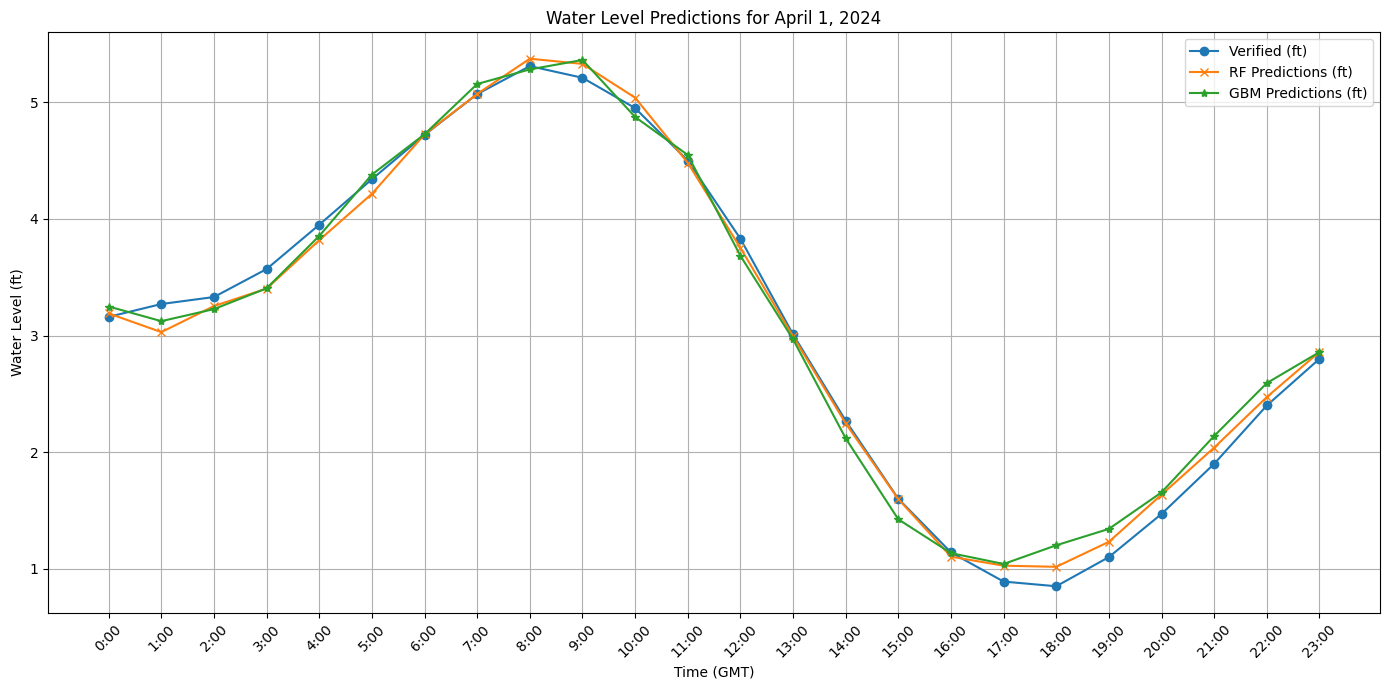

In [11]:
import matplotlib.pyplot as plt

# Plotting the predictions and actual values
plt.figure(figsize=(14, 7))
plt.plot(predictions_results['Time (GMT)'], predictions_results['Verified (ft)'], label='Verified (ft)', marker='o')
plt.plot(predictions_results['Time (GMT)'], predictions_results['RF Predictions (ft)'], label='RF Predictions (ft)', marker='x')
plt.plot(predictions_results['Time (GMT)'], predictions_results['GBM Predictions (ft)'], label='GBM Predictions (ft)', marker='*')

plt.title('Water Level Predictions for April 1, 2024')
plt.xlabel('Time (GMT)')
plt.ylabel('Water Level (ft)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Actual verified levels
y_true = predictions_results['Verified (ft)'].values

# RF model predictions
rf_predictions = predictions_results['RF Predictions (ft)'].values

# GBM model predictions
gbm_predictions = predictions_results['GBM Predictions (ft)'].values

# Calculate MSE, MAE, RMSE, R2 for RF
mse_rf = mean_squared_error(y_true, rf_predictions)
mae_rf = mean_absolute_error(y_true, rf_predictions)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_true, rf_predictions)

# Calculate MSE, MAE, RMSE, R2 for GBM
mse_gbm = mean_squared_error(y_true, gbm_predictions)
mae_gbm = mean_absolute_error(y_true, gbm_predictions)
rmse_gbm = np.sqrt(mse_gbm)
r2_gbm = r2_score(y_true, gbm_predictions)

(mse_rf, mae_rf, rmse_rf, r2_rf), (mse_gbm, mae_gbm, rmse_gbm, r2_gbm)


((0.011665375000000122,
  0.08737500000000042,
  0.10800636555314748,
  0.994370558783906),
 (0.0221349600198644,
  0.12403424632623701,
  0.14877822427984683,
  0.9893181782623862))

**Random Forest (RF) Model:**
- Mean Squared Error (MSE): 0.012
- Mean Absolute Error (MAE): 0.087
- Root Mean Squared Error (RMSE): 0.108
- R-squared (R²): 0.994

**Gradient Boosting Machine (GBM) Model:**
- Mean Squared Error (MSE): 0.022
- Mean Absolute Error (MAE): 0.124
- Root Mean Squared Error (RMSE): 0.149
- R-squared (R²): 0.989

In [13]:
# Stop tracking and get emissions data
emissions = tracker.stop()
print(f"Estimated CO2 emissions for the computation: {emissions} kg")

[codecarbon INFO @ 22:44:46] Energy consumed for RAM : 0.000040 kWh. RAM Power : 5.884547710418702 W
[codecarbon INFO @ 22:44:46] Energy consumed for all GPUs : 0.000127 kWh. Total GPU Power : 19.64407154893367 W
[codecarbon INFO @ 22:44:46] Energy consumed for all CPUs : 0.000286 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 22:44:46] 0.000453 kWh of electricity used since the beginning.


Estimated CO2 emissions for the computation: 0.00016715606905573336 kg
